In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import Interactive widgets
from ipywidgets import interact
import ipywidgets as widgets


# COVID-19 Data Exploration

## Import data

In [2]:
# data path
data_csv = "../0_data/phe_cases_london_boroughs.csv"

data = pd.read_csv(data_csv)

In [45]:
# Set Jupyter Notebook max row display
pd.set_option ('display.max_row', 200)

# Bigger plots!
plt.rcParams["figure.figsize"] = (20,10)

## Print data table

In [4]:
data.head(100)

,area_code,area_name,date,new_cases,total_cases
0,E09000001,City of London,2020-01-30,0,0
1,E09000002,Barking and Dagenham,2020-01-30,0,0
2,E09000003,Barnet,2020-01-30,0,0
3,E09000004,Bexley,2020-01-30,0,0
4,E09000005,Brent,2020-01-30,0,0
5,E09000006,Bromley,2020-01-30,0,0
6,E09000007,Camden,2020-01-30,0,0
7,E09000008,Croydon,2020-01-30,0,0
8,E09000009,Ealing,2020-01-30,0,0
9,E09000010,Enfield,2020-01-30,0,0


## List of Boroughs

In [5]:
boroughs = data.area_name.unique()
print('\n'.join(boroughs))

City of London
Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


## Number of Boroughs

In [6]:
boroughs.shape[0]

33

## Explore data

In [7]:
# Explore data in a table

data[data.area_name.eq(boroughs[27])].iloc[115:125]

,area_code,area_name,date,new_cases,total_cases
3822,E09000028,Southwark,2020-05-24,0,1264
3855,E09000028,Southwark,2020-05-25,1,1265
3888,E09000028,Southwark,2020-05-26,1,1266
3921,E09000028,Southwark,2020-05-27,5,1271
3954,E09000028,Southwark,2020-05-28,1,1272
3987,E09000028,Southwark,2020-05-29,1,1273
4020,E09000028,Southwark,2020-05-30,0,1273
4053,E09000028,Southwark,2020-05-31,1,1274
4086,E09000028,Southwark,2020-06-01,0,1274
4119,E09000028,Southwark,2020-06-02,0,1274


In [46]:
# Explore shape of cases for each borough

def plot_borough(borough):
    plt.figure();
    data[data.area_name.eq(borough)].plot(x='date', y='new_cases', ylim=[0,data.new_cases.max()])
    plt.figure();
    data[data.area_name.eq(borough)].plot(x='date', y='total_cases', ylim=[0,data.total_cases.max()])
    print(borough)

interact(plot_borough, borough = widgets.Dropdown(options=boroughs,
                                            description='Borough:',
                                            disabled=False,))

interactive(children=(Dropdown(description='Borough:', options=('City of London', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'), value='City of London'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_borough>

## Total cases across all boroughs

In [9]:
borough_totals = data.groupby('area_name').total_cases.sum()
print(borough_totals)

area_name
Barking and Dagenham      30220
Barnet                    81840
Bexley                    41672
Brent                     91575
Bromley                   74088
Camden                    39148
City of London             1113
Croydon                   91909
Ealing                    71771
Enfield                   53818
Greenwich                 42963
Hackney                   41315
Hammersmith and Fulham    39654
Haringey                  37498
Harrow                    62414
Havering                  41976
Hillingdon                47847
Hounslow                  44463
Islington                 29365
Kensington and Chelsea    32153
Kingston upon Thames      30150
Lambeth                   77800
Lewisham                  61079
Merton                    43866
Newham                    62777
Redbridge                 45625
Richmond upon Thames      25429
Southwark                 81497
Sutton                    44105
Tower Hamlets             40388
Waltham Forest            4743

## Total cases over time

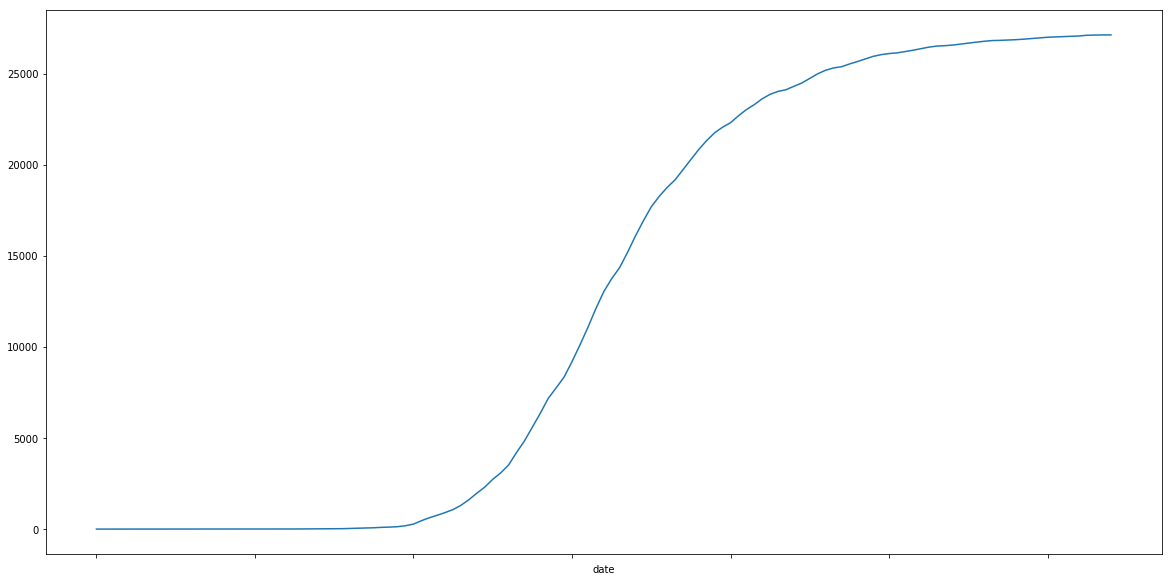

In [47]:
data.groupby('date').total_cases.sum().plot()

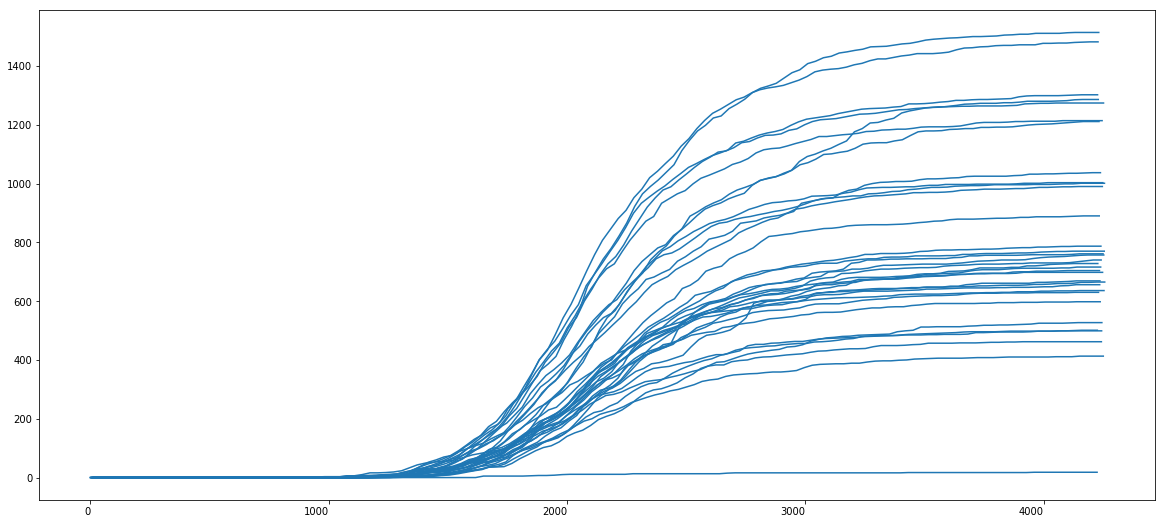

In [48]:
data.groupby('area_name').total_cases.plot(subplots=True);

## New cases, all boroughs

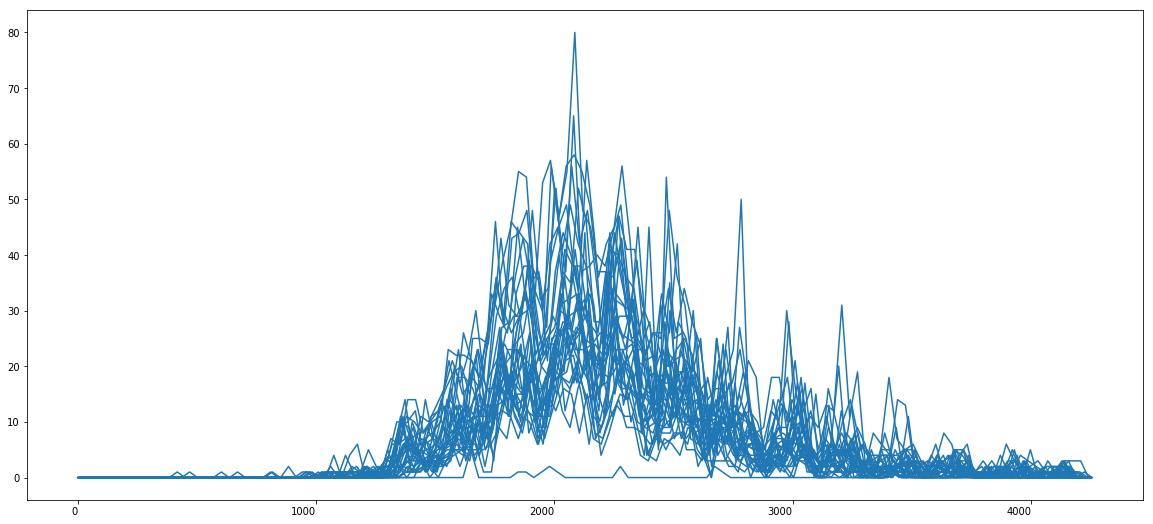

In [49]:
data.groupby('area_name').new_cases.plot(subplots=True);

### Max number of daily new cases per borough

In [13]:
data.groupby('area_name').max()

,area_code,date,new_cases,total_cases
area_name,,,,
Barking and Dagenham,E09000002,2020-06-06,22,501
Barnet,E09000003,2020-06-06,65,1302
Bexley,E09000004,2020-06-06,40,728
Brent,E09000005,2020-06-06,58,1482
Bromley,E09000006,2020-06-06,49,1286
Camden,E09000007,2020-06-06,29,630
City of London,E09000001,2020-06-06,5,18
Croydon,E09000008,2020-06-06,80,1514
Ealing,E09000009,2020-06-06,45,1211


### Explore scatter and bubble plot shapes

Text(0.5,1,'new cases over total cases, marker size also shows # new cases')

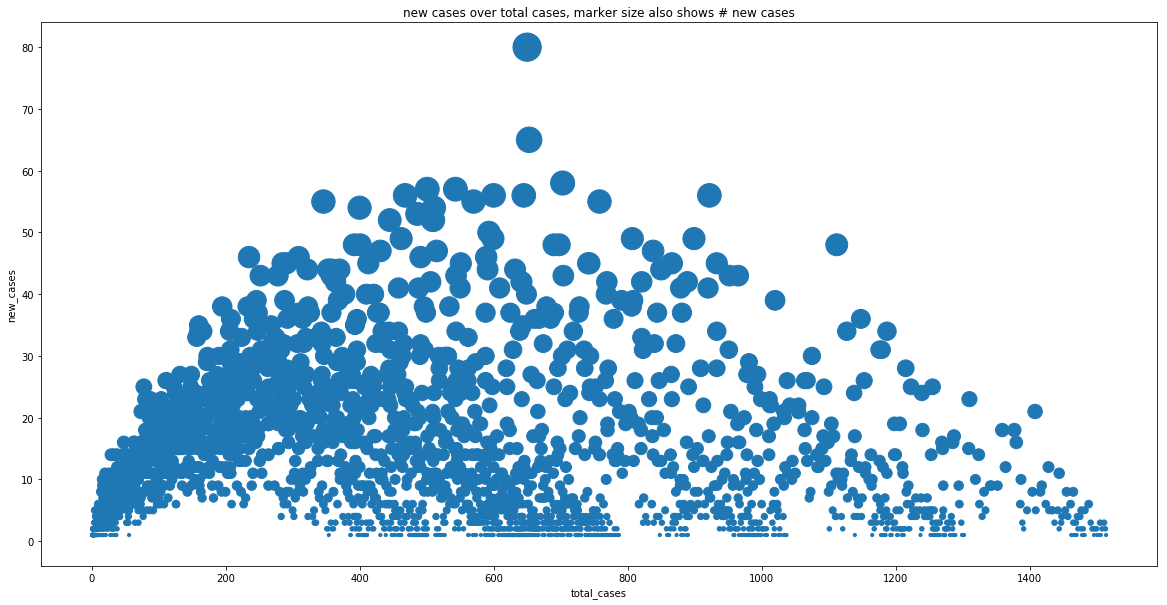

In [55]:
data.plot.scatter(x='total_cases', y='new_cases', s=data['new_cases']*10);
plt.title('new cases over total cases, marker size also shows # new cases')

Text(0.5,1,'total cases against new cases, marker size also shows # new cases')

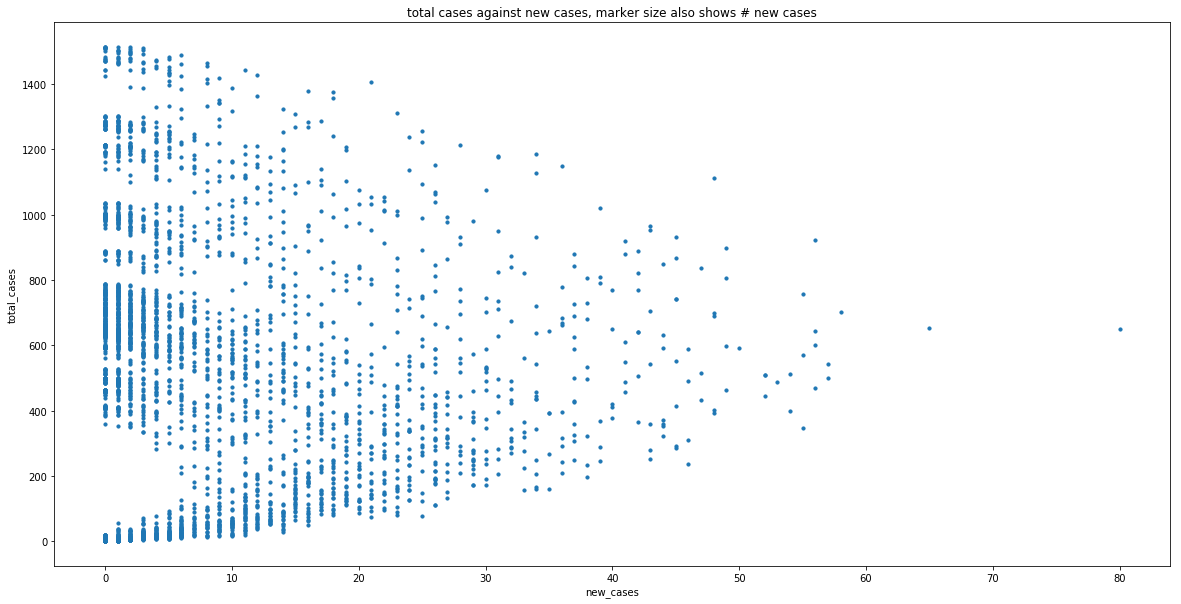

In [57]:
data.plot.scatter(x='new_cases', y='total_cases', s=10);
plt.title('total cases against new cases, marker size also shows # new cases')

In [24]:
# Get dates in datetime format for bubble plot
dates = [pd.to_datetime(d) for d in data.date]

Text(0.5,1,'new cases over time')

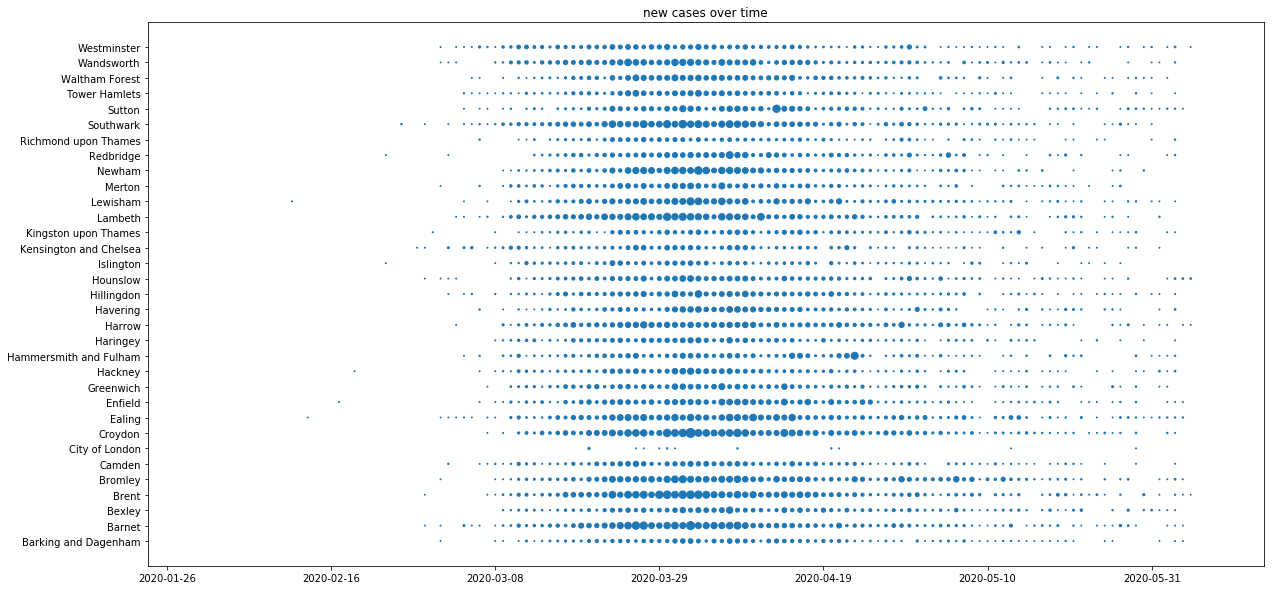

In [53]:
plt.scatter(dates,data.area_name, s=data.new_cases)
plt.title('new cases over time')

Text(0.5,1,'new cases over time, marker size realted to total cases')

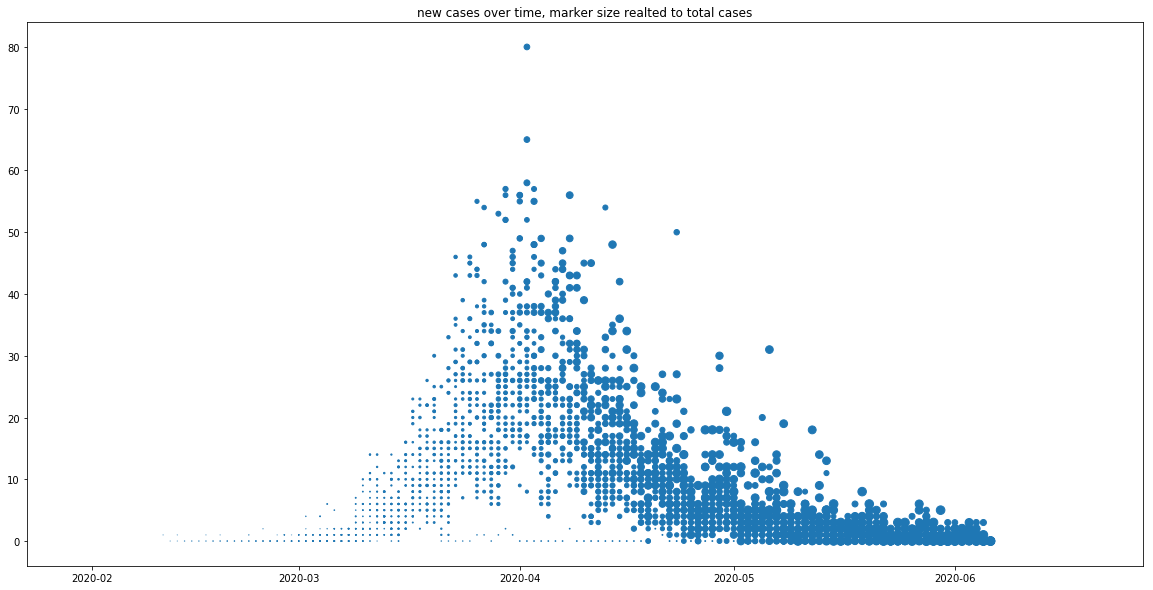

In [69]:
plt.scatter(dates,data.new_cases, s=data.total_cases/20)
plt.title('new cases over time, marker size realted to total cases')

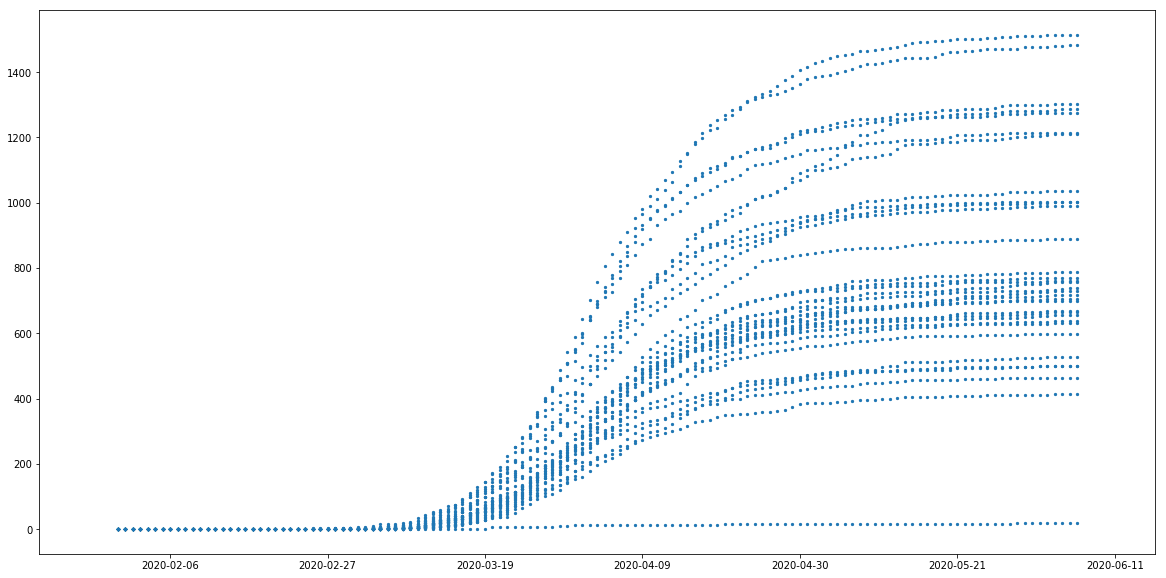

In [68]:
plt.scatter(dates,data.total_cases, s=5)

Text(0.5,1,'total cases over time')

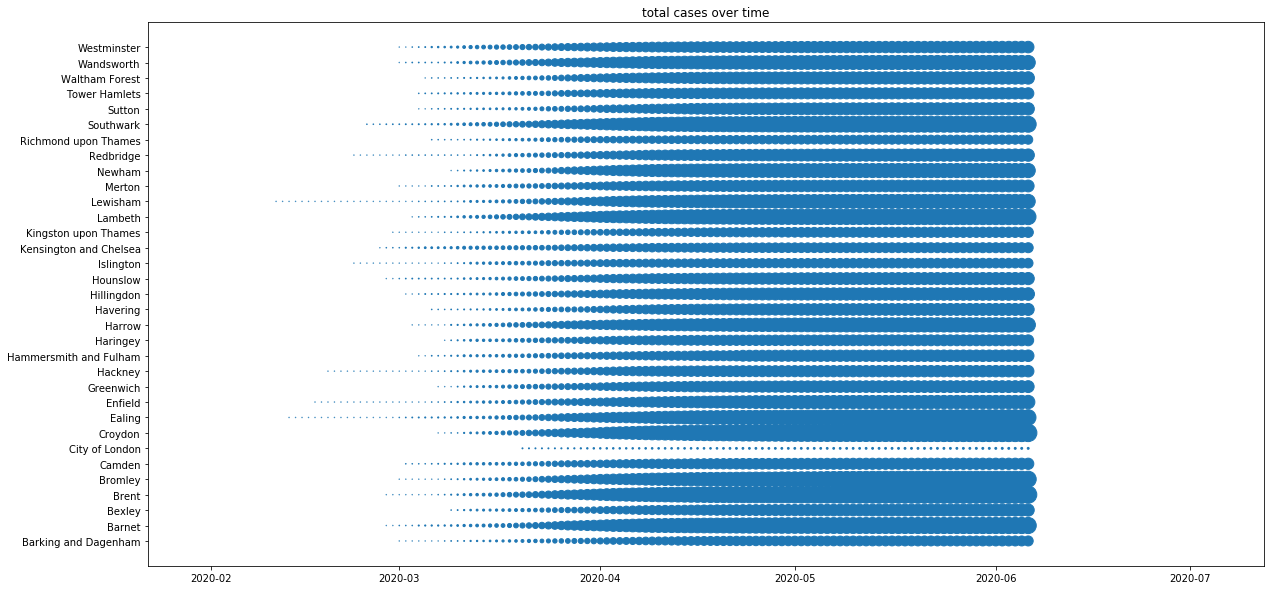

In [72]:
plt.scatter(dates, data.area_name, s=data.total_cases/5)
plt.title('total cases over time')

### Explore just one borough (Southwark)

In [37]:
southwark = data[data.area_name.eq('Southwark')]

Text(0.5,1,'Southwark: ')

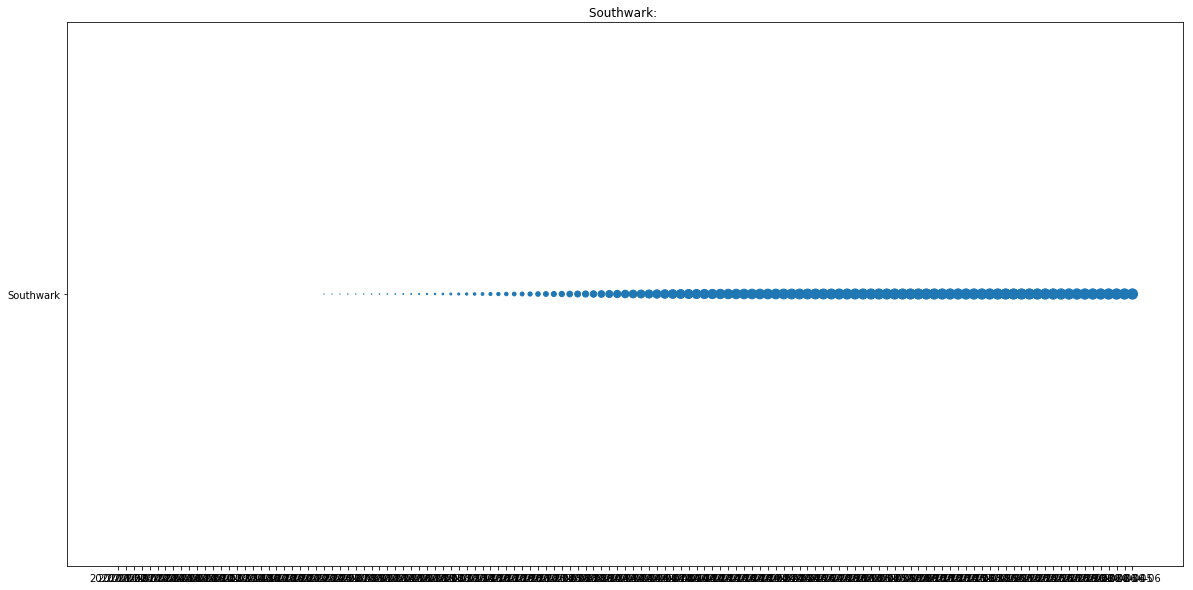

In [85]:
plt.scatter(southwark.date, southwark.area_name, s=southwark.total_cases/12)
plt.title('Southwark: ')

Text(0.5,1,'new cases over time, marker size realted to total cases')

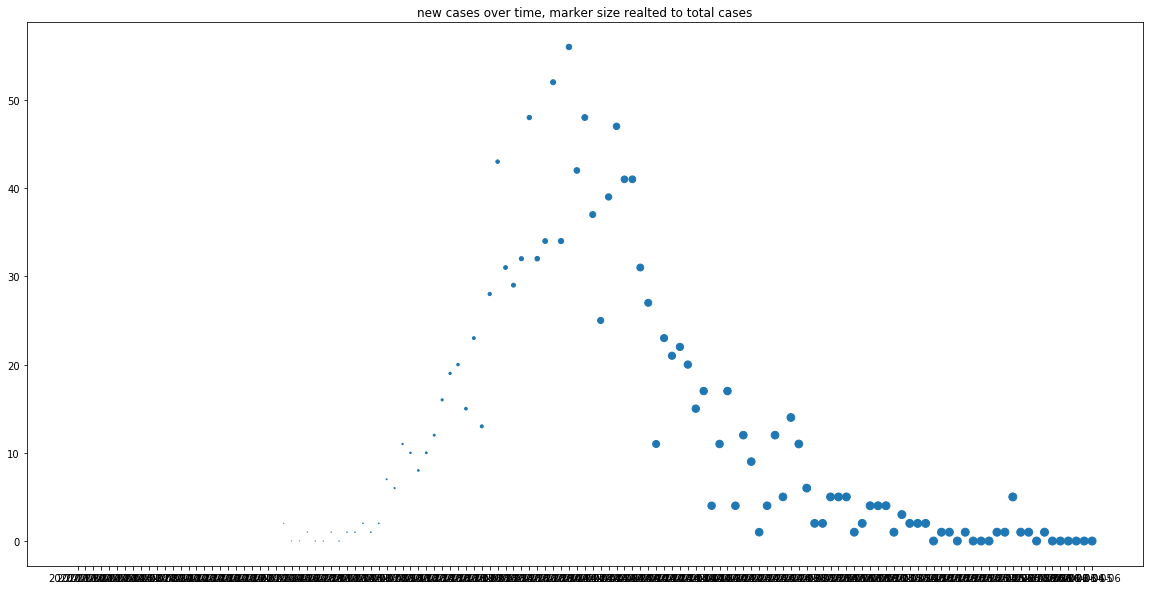

In [74]:
plt.scatter(southwark.date,southwark.new_cases, s=southwark.total_cases/20)
plt.title('new cases over time, marker size realted to total cases')

In [100]:
def scatterplot_borough(b):
    plt.figure();
    plt.scatter(data[data.area_name.eq(b)].date, 
                data[data.area_name.eq(b)].new_cases, 
                s=data[data.area_name.eq(b)].total_cases)
    plt.ylim(0,data.new_cases.max())
    print(b)

interact(scatterplot_borough, b = widgets.Dropdown(options=boroughs,
                                            description='Borough:',
                                            disabled=False,))

interactive(children=(Dropdown(description='Borough:', options=('City of London', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'), value='City of London'), Output()), _dom_classes=('widget-interact',))

<function __main__.scatterplot_borough>